## Questão 2 – Self-Organizing Map (SOM) com Distribuições Gaussianas

A **propriedade de ordenação topológica** do algoritmo **SOM** pode ser usada para formar uma **representação bidimensional abstrata** para fins de **visualização de um espaço de entrada de alta dimensionalidade**.

O objetivo é visualizar os dados de **dimensão 8** em um espaço de dimensão 2, constituído pela grade de neurônios da SOM.

Para investigar essa forma de representação, considere uma **grade bidimensional de neurônios**, que é treinada tendo como entrada os dados oriundos de **quatro distribuições gaussianas**:

- \( C_1, C_2, C_3, C_4 \) no espaço de entrada de dimensionalidade \( t = (x_1, x_2, ... x_8)^T \)

Todas as distribuições possuem:

- **Variância unitária**
- **Centroides (médias) distintos**, dados por:

\[
\begin{align*}
m_1 &= (0, 0, 0, 0, 0, 0, 0, 0)^T \\
m_2 &= (0, 0, 0, 0, 0, 0, 0, 4)^T \\
m_3 &= (0, 0, 0, 0, 0, 0, 4, 0)^T \\
m_4 &= (4, 0, 0, 0, 0, 0, 0, 0)^T
\end{align*}
\]


In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=71305e05dcc1a439bfd678d4e9986284410935e0b6b8911c8142cb8645d75847
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom



---

### a) Geração dos dados

Gere as quatro **distribuições gaussianas** correspondentes a cada centroide \( m_1, m_2, m_3, m_4 \).

---


### b) Treinamento e visualização com SOM

Utilize uma **rede SOM** formada por uma **grade de 10×10 neurônios** e obtenha a **representação das quatro distribuições em duas dimensões no SOM**.

A representação gráfica deve permitir **visualizar a separação dos clusters**.


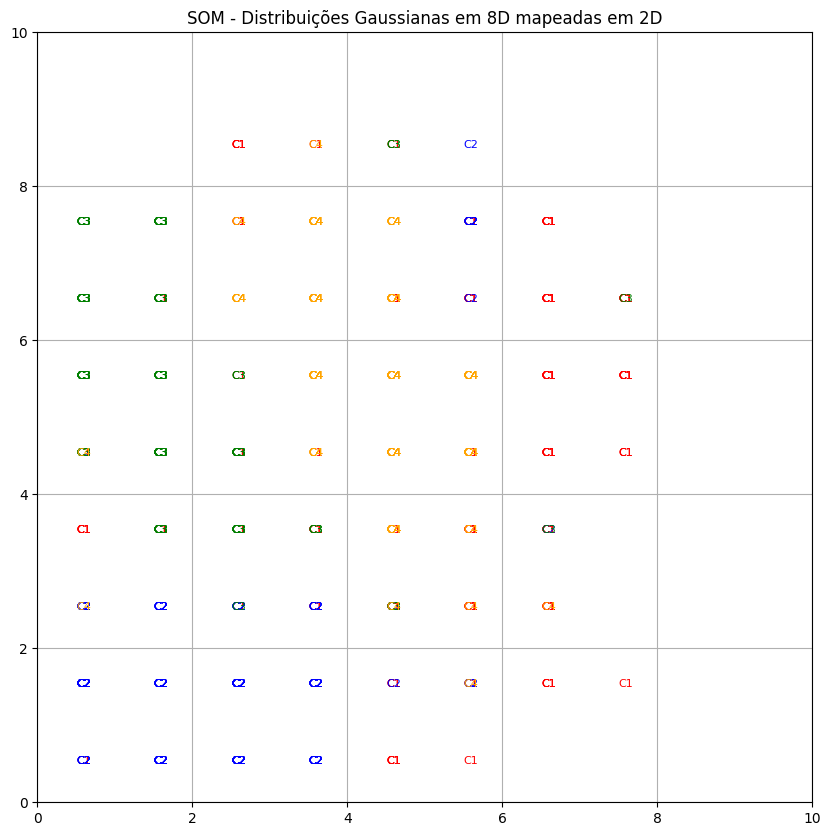

In [ ]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# Parâmetros
dim = 8
num_amostras = 200
variancia = 1.0

# Médias dos clusters (C1 a C4)
m1 = np.zeros(dim)
m2 = np.array([0,0,0,0,0,0,0,4])
m3 = np.array([0,0,0,0,0,0,4,0])
m4 = np.array([4,0,0,0,0,0,0,0])

# Gerando as distribuições gaussianas
C1 = np.random.normal(loc=m1, scale=variancia, size=(num_amostras, dim)) #media, desvio padrão, Quantidade e forma dos dados a serem gerados
C2 = np.random.normal(loc=m2, scale=variancia, size=(num_amostras, dim))
C3 = np.random.normal(loc=m3, scale=variancia, size=(num_amostras, dim))
C4 = np.random.normal(loc=m4, scale=variancia, size=(num_amostras, dim))

# Concatenar todas as amostras
dados = np.vstack((C1, C2, C3, C4))
rotulos = ['C1']*num_amostras + ['C2']*num_amostras + ['C3']*num_amostras + ['C4']*num_amostras

# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dados_norm = scaler.fit_transform(dados)

# Criar SOM 10x10
som = MiniSom(x=10, y=10, input_len=dim, sigma=1.0, learning_rate=0.5, random_seed=42) #grade 10x10, entrada, vizinhança, Taxa de aprendizado inicial,
som.train_random(dados_norm, 1000) #treinamento com 1000 iterações

# Plotar clusters
plt.figure(figsize=(10, 10))
cores = {'C1': 'red', 'C2': 'blue', 'C3': 'green', 'C4': 'orange'}

for i, x in enumerate(dados_norm):
    w = som.winner(x)  # coordenada (x, y) do neurônio vencedor
    plt.text(w[0]+0.5, w[1]+0.5, rotulos[i],
             color=cores[rotulos[i]], fontdict={'size': 8})
plt.title("SOM - Distribuições Gaussianas em 8D mapeadas em 2D")
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.grid(True)
plt.show()
